<a href="https://colab.research.google.com/github/iam-navyaK/Netflix-Dataset-Analysis/blob/main/netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas matplotlib seaborn sqlalchemy
# Optional (only if you want dashboards later)
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.6 MB/s eta 0:00:00


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from google.colab import files

# Upload from local computer
uploaded = files.upload()

# Load into pandas (must match the filename you upload)
df = pd.read_csv("netflix_titles.csv")

df.head()# Quick peek
print("Shape:", df.shape)
print(df.columns)
df.head()

# Fill missing values safely
df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
# Some rows may have date_added blank; handle if needed
df['date_added'] = df['date_added'].fillna('Unknown')

# Convert types
# release_year may already be int; ensure safe conversion
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').fillna(0).astype(int)

# Optional: create new column for year when it was added to Netflix (if available)
def safe_year(x):
    try:
        return pd.to_datetime(x).year
    except:
        return None

df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year

# Save cleaned CSV
df.to_csv("netflix_cleaned.csv", index=False)
print("Saved netflix_cleaned.csv")


Saving netflix_titles.csv to netflix_titles (1).csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8807           4528                7692   
top      s8807  Movie  Zubaan  Rajiv Chilak

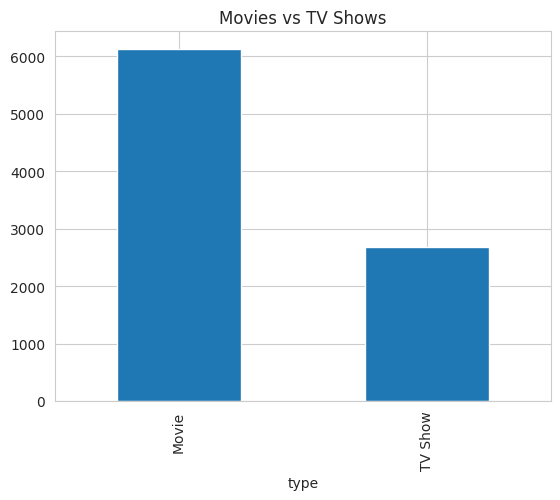

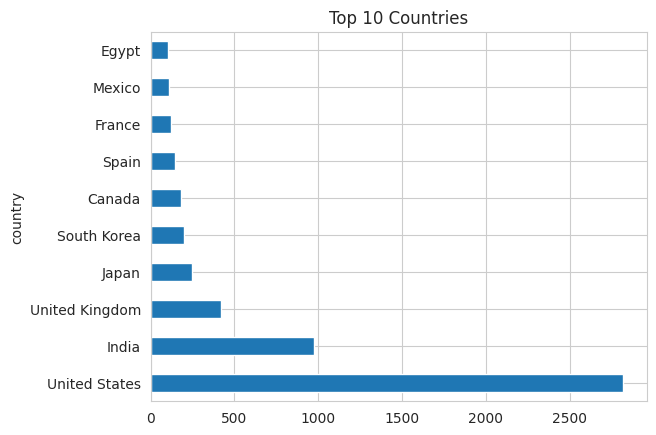

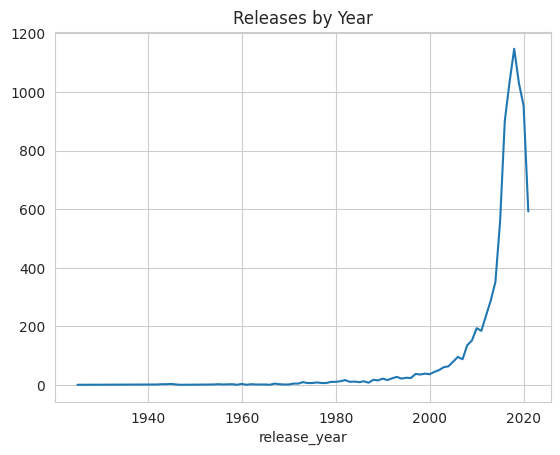

Saved cleaned data into netflix.db (table: netflix)


In [17]:
# Basic stats
print(df.info())
print(df.describe(include='all'))

# Counts
print(df['type'].value_counts())
print(df['country'].value_counts().head(20))
print(df['rating'].value_counts())

# Missing values
print(df.isnull().sum())

# Visual quick charts
df['type'].value_counts().plot(kind='bar', title='Movies vs TV Shows'); plt.show()
df['country'].value_counts().head(10).plot(kind='barh', title='Top 10 Countries'); plt.show()
df['release_year'].value_counts().sort_index().plot(kind='line', title='Releases by Year'); plt.show()
import sqlite3

# Connect (creates netflix.db file in your folder)
conn = sqlite3.connect("netflix.db")

# Write dataframe to table 'netflix'
df.to_sql("netflix", conn, if_exists="replace", index=False)

# Close connection
conn.close()

print("Saved cleaned data into netflix.db (table: netflix)")



In [22]:
import sqlite3
conn = sqlite3.connect("netflix.db")
from google.colab import files
files.download("netflix.db")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>